## Food 101 Challenge Problem
### Author: Clarisa Benett
#### I chose to use the Fast.ai library that is built on top of pytorch along with some best practices learned throughout the course to tackle this dataset.

In [1]:
#import necessary libraries from fastai
%matplotlib inline
from fastai.basics import *
import pandas as pd
from fastai.vision import *
from fastai.metrics import error_rate,accuracy

In [2]:
#define where my data sits
data_path = Config().data_path()/'food-101'
data_path

PosixPath('/home/jupyter/.fastai/data/food-101')

In [3]:
#navigate to data folder and untar data
# cd ~/.fastai/data
# !tar -xvf 'food-101.tar'


In [4]:
#navigate back to current directory
# cd ~/tutorials/fastai/course-v3/nbs/dl2

In [5]:
#define where my images are located
img_path = data_path/'images'

In [6]:
#view my classes which are organized as folders
img_path.ls()[0]

PosixPath('/home/jupyter/.fastai/data/food-101/images/filet_mignon')

### Here is where I prepare my data for my cnn model:
#### -`valid_pct` takes a random 20% of my data and uses it as validation data
#### -`get_transforms()` will perform random transformations on my validation which includes horizontal flips (model shall recognize food regardless regardless of horizontal flip, 10 degree rotations, random zoom between 100%-110%, lighting transformations, warping of 20%, etc. 
#### -`size` will crop images to be 224x224
#### -`num_workers` will help speed up the process of dataloader preparing batches (Note: batch size defaults to 64)
#### -`normalize(imagenet_stats)` will normalize out image data to prepare for input to cnn

In [7]:
data = ImageDataBunch.from_folder(img_path, train='.', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
#ensure our classes where understood correctly, we can view them
data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

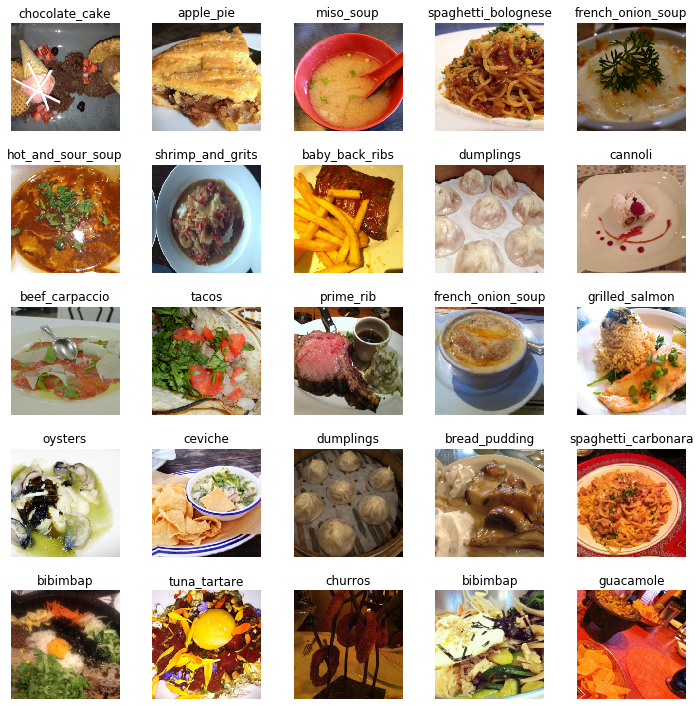

In [9]:
#view a portion of the randomly selected batch
data.show_batch(rows = 5, figsize = (10,10))

In [20]:
#here we create our learner using our data and resnet 34 as our basis,
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [21]:
#view our layers
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

#### Here we begin training by fitting our last few layers to the data while `fit_one_cycle` varies the learning rate during training so that we learn slower at the beginning, faster towards the middle-end, and smaller at the end to try to hone in on optimal loss

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.241698,1.715856,0.555693,10:02
1,1.773894,1.408919,0.631881,10:08
2,1.580036,1.276163,0.662871,10:10
3,1.415559,1.239200,0.673762,10:03


In [23]:
#save progresss
learn.save('checkpoint_1')

In [24]:
#train earlier layers (unfreeze)
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


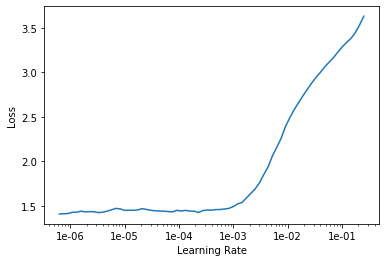

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.314395,1.075786,0.714752,10:23
1,1.086874,0.992727,0.736337,10:25


In [28]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.082026,0.955054,0.744455,10:25
1,0.948936,0.904872,0.758515,10:23


In [29]:
#store my model params: weights, transforms, etc. 
learn.export()

I was able to achieve 75.8% accuracy using resnet34. I chose accuracy for my goal metric because my data was distributed evenly among all classes of foods. The random chance of my CNN guessing the correct class was 1/102 which is <1%. Therefore, accuracy is a useful metric to determine the quality of the model. 